In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mat
import matplotlib.pylab as pylab
import statsmodels.api as sm
import statsmodels.stats as sm_stats
import statsmodels.stats.api as sms
import scipy.stats as stats
import seaborn as sns

from encodings.aliases import aliases
%matplotlib inline

# Prieskumná analýza dataset 027 Sližik, Urge
## Extrakcia dát
### Na základe rozboru sme sa rozhodli pre jednotný encoding utf-8

In [7]:
files = ["027/user.csv", "027/session.csv", "027/product.csv"]
codecs = set(aliases.values())
successful_encodings = {file: set() for file in files}

for file in files:
    for encoding in codecs:
        try:
            df=pd.read_csv(file, nrows=10, encoding=encoding, sep='\t')
            successful_encodings[file].add(encoding)
        except:
            pass

list(set.intersection(*successful_encodings.values()))

['iso8859_4',
 'cp437',
 'cp858',
 'hp_roman8',
 'mac_turkish',
 'cp500',
 'cp863',
 'mac_latin2',
 'utf_8',
 'cp855',
 'iso8859_10',
 'iso8859_13',
 'cp273',
 'cp860',
 'mbcs',
 'mac_greek',
 'cp1125',
 'iso8859_16',
 'koi8_r',
 'cp1256',
 'cp861',
 'iso8859_15',
 'cp1140',
 'ptcp154',
 'cp850',
 'cp862',
 'mac_cyrillic',
 'iso8859_5',
 'iso8859_14',
 'cp1026',
 'iso8859_9',
 'mac_iceland',
 'cp775',
 'mac_roman',
 'cp865',
 'cp852',
 'latin_1',
 'iso8859_2',
 'cp866',
 'cp037',
 'iso8859_11']

In [8]:
users = pd.read_csv("027/user.csv", encoding="utf_8", sep='\t')
products = pd.read_csv("027/product.csv", encoding="utf_8", sep='\t')
sessions = pd.read_csv("027/session.csv", encoding="utf_8", sep='\t')

# 1.1 Základný opis dát spolu s ich charakteristikami
## Súbor user.csv

In [9]:
users

,birthdate,residence,registration,name,username,race,job,mail,user_id,sex,address
0,NaN,"2482 Alyssa Shores\nToniport, NJ 41252",2014-02-25,Michael Anderson,bookerstephanie,NaN,NaN,james99@hotmail.com,610,NaN,"015 Morris Causeway\nStevenville, VT 13901"
1,1931-05-19,NaN,2014/10/14,近藤 幹,inoueyosuke,NaN,薬剤師,yoshidayoko@gmail.com,1833,NaN,三重県匝瑳市吾妻橋37丁目16番3号 長間コート908
2,NaN,NaN,28 Oct 2017,Jason Meyers,leah02,indian,NaN,brent21@yahoo.com,342,M,"1286 Alexander Spring\nNorth Madelinestad, RI ..."
3,2019-08-06,NaN,05 Apr 2019,Antje Seip,hilmar39,asian,NaN,ybeer@web.de,270,F,Daniele-Siering-Straße 71\n85322 Stade
4,NaN,NaN,2019/08/10,Ester Becker,casparbernard,NaN,NaN,sthanel@yahoo.de,1455,F,Stollstraße 040\n85829 Apolda
...,...,...,...,...,...,...,...,...,...,...,...
2567,NaN,NaN,2018-09-19,RNDr. Alžběta Holubová Th.D.,zdenkamachova,NaN,NaN,mvlckova@post.cz,441,F,Na Poustkách 790\n786 18 Rožmberk nad Vltavou
2568,1931-10-03,宮崎県横浜市港北区元浅草19丁目10番14号,20 Oct 2016,橋本 春香,hiroshi22,asian,NaN,hiroshi59@hotmail.com,1069,F,広島県夷隅郡大多喜町日本堤11丁目9番16号
2569,NaN,NaN,2019-02-07,Stephanie Stanley,laura24,NaN,NaN,hwilkinson@hotmail.com,632,NaN,"854 Stephanie Spurs\nPort Tiffany, MO 00512"
2570,2021-10-07,NaN,2018-03-01,Alexandra Kabus-Wende,xhornig,NaN,NaN,annyhiller@gmx.de,89,F,Diethard-Geißler-Platz 784\n86945 Kemnath


In [10]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2572 entries, 0 to 2571
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   birthdate     1415 non-null   object
 1   residence     900 non-null    object
 2   registration  2572 non-null   object
 3   name          2572 non-null   object
 4   username      2572 non-null   object
 5   race          772 non-null    object
 6   job           1029 non-null   object
 7   mail          2572 non-null   object
 8   user_id       2572 non-null   int64 
 9   sex           1286 non-null   object
 10  address       2186 non-null   object
dtypes: int64(1), object(10)
memory usage: 221.2+ KB


In [11]:
users.describe(include='object')

,birthdate,residence,registration,name,username,race,job,mail,sex,address
count,1415,900,2572,2572,2572,772,1029,2572,1286,2186
unique,1394,900,2373,2523,2542,5,620,2565,2,2186
top,1985-11-04,"2482 Alyssa Shores\nToniport, NJ 41252","03/30/2018, 00:00:00",伊藤 花子,fduarte,unspecified,Fachinformatiker,btakahashi@gmail.com,F,"015 Morris Causeway\nStevenville, VT 13901"
freq,2,1,3,3,2,227,8,3,665,1


In [12]:
users.race.unique().tolist()

[nan, 'indian', 'asian', 'unspecified', 'black', 'white']

In [13]:
users.sex.unique().tolist()

[nan, 'M', 'F']

users.scv obsahuje 2572 riadkov a 11 nasledovných stĺpcov:
* birthdate - dátum narodenia
* residence - bydlisko
* name - skutočné meno
* username - užívateľské meno
* race - rasa obsahujúca hodnoty (nan, 'indian', 'asian', 'unspecified', 'black', 'white')
* job - povolanie
* mail - mailová adresa
* user_id - id u_int užívateľa, po bližšom rozbore však zisťuje, že obsahuje duplikátne hodnoty, využijeme ho pri neskoršom prepojení s ďalšími súbormi
* sex - pohlavie nadobúda hodnoty ('F', nan, 'M')
* address - adresa užívateľa

## Súbor products.csv

In [14]:
products

,location,code,product_ean,store_name
0,America/Sao_Paulo,BR,3146833119797,Palmeira
1,Europe/Zaporozhye,UA,5242711261997,Polohy
2,Africa/Lagos,NG,4594442618580,Lagos
3,Asia/Kolkata,IN,1317624489050,Madhipura
4,America/New_York,US,4361524234705,Kensington
...,...,...,...,...
14923,America/Los_Angeles,US,4298687935821,Porterville
14924,Africa/Douala,CM,1265030673672,Mbalmayo
14925,Asia/Samarkand,UZ,2351607001494,Jizzax
14926,America/Chicago,US,4013202681737,Abilene


In [15]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14928 entries, 0 to 14927
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   location     14928 non-null  object
 1   code         14920 non-null  object
 2   product_ean  14928 non-null  int64 
 3   store_name   14928 non-null  object
dtypes: int64(1), object(3)
memory usage: 466.6+ KB


In [16]:
products.describe(include='object')

,location,code,store_name
count,14928,14920,14928
unique,184,133,958
top,America/New_York,US,Gates-North Gates
freq,1161,2582,28


products.scv obsahuje 14928 riadkov a 4 nasledovné stĺpce:
* location - svetadiel/krajina 
* code - kód krajiny
* product_ean - čiarový kód
* store_name - názov obchodu

## Súbor sessions.csv

In [17]:
sessions

,pct_scroll_move_duration,pct_click_product_info,pct_click,pct_rage_click,pct_mouse_move,wild_mouse_duration,pct_wild_mouse,session_id,scroll_move_total_rel_distance,product_ean,...,session_duration,pct_doubleclick,ack,session_start,user_id,mouse_move_total_rel_distance,pct_input,screen_width,browser_name,pct_mouse_click
0,8.85488,43.64091,8.98795,40.67262,12.05233,10.92406,40.31171,631257,12.11598,6055136974989,...,89.75126,10.95194,0.0,2021-11-14 18:41:59,973,7.26770,0.07011,1024,other,11.58339
1,5.51742,46.12390,9.49791,51.51026,12.40687,9.49005,43.79400,189788,5.36070,8394513754102,...,182.38368,11.22674,0.0,2023-06-05 02:49:55,1944,10.85288,0.01634,1280,other,13.61084
2,8.14823,48.82215,11.86306,65.56987,12.75475,11.24635,65.01636,241847,9.45548,3151508632051,...,131.88025,12.45882,0.0,2020-10-04 22:26:54,211,12.81383,0.09676,1366,edge,10.08739
3,7.55270,31.00850,13.40154,49.76564,12.43207,13.00626,60.59046,1065070,10.61975,1696354183545,...,38.58611,10.43164,0.0,2019-11-04 04:03:38,2268,14.72482,0.55836,1280,chrome,7.63693
4,13.87674,54.07735,13.27578,32.79394,10.07664,13.50254,51.24497,1002613,11.71293,2095486426558,...,160.03964,11.49121,1.0,2022-04-29 19:17:17,776,11.43008,0.91849,1920,chrome,13.02173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11054,10.59596,56.34633,7.99554,40.65971,14.19494,9.42995,46.50430,786957,12.82270,5823237275196,...,114.70123,13.28359,0.0,2022-10-30 13:16:31,1363,8.34259,0.01521,1920,edge,12.11110
11055,8.54598,68.63714,13.58541,44.14301,12.44711,10.48967,56.85204,1115132,6.56581,5028100499550,...,212.71416,11.91779,0.0,2021-03-05 09:44:27,613,14.29348,0.04540,1920,chrome,11.08003
11056,11.80273,63.18318,12.28004,45.05993,11.93748,13.11262,51.05285,494318,14.19901,9913770431350,...,99.75251,12.18983,0.0,2022-12-30 20:17:34,2231,10.75047,0.62208,800,edge,9.70017
11057,8.39329,14.04450,9.66773,59.98017,9.86632,11.34093,55.54578,316999,10.36205,763513380761,...,199.79640,10.33540,0.0,2021-04-13 20:08:31,743,8.24977,0.10676,1366,opera,11.40967


In [18]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11059 entries, 0 to 11058
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   pct_scroll_move_duration        11048 non-null  float64
 1   pct_click_product_info          11048 non-null  float64
 2   pct_click                       11047 non-null  float64
 3   pct_rage_click                  11048 non-null  float64
 4   pct_mouse_move                  11048 non-null  float64
 5   wild_mouse_duration             11048 non-null  float64
 6   pct_wild_mouse                  11048 non-null  float64
 7   session_id                      11059 non-null  int64  
 8   scroll_move_total_rel_distance  11048 non-null  float64
 9   product_ean                     11059 non-null  int64  
 10  pct_scrandom                    11047 non-null  float64
 11  total_load_time                 11059 non-null  float64
 12  screen_height                   

In [19]:
sessions.describe()

,pct_scroll_move_duration,pct_click_product_info,pct_click,pct_rage_click,pct_mouse_move,wild_mouse_duration,pct_wild_mouse,session_id,scroll_move_total_rel_distance,product_ean,...,total_load_time,page_activity_duration,pct_scroll_move,session_duration,pct_doubleclick,ack,user_id,mouse_move_total_rel_distance,pct_input,pct_mouse_click
count,11048.000000,11048.000000,11047.000000,11048.000000,11048.000000,11048.000000,11048.000000,1.105900e+04,11048.000000,1.105900e+04,...,11059.000000,11048.000000,11048.000000,11059.000000,11048.000000,11059.000000,11059.000000,11048.000000,11048.000000,11048.000000
mean,10.983494,48.080184,10.807807,48.702596,10.627289,10.801534,50.967452,7.506198e+05,10.130209,4.970423e+12,...,4.014985,10.810794,53.130001,149.885079,10.796134,0.548060,1246.961208,10.811311,0.564632,11.744904
std,2.207290,12.062837,2.199593,13.050580,2.193292,2.168525,13.513747,4.322445e+05,2.552476,2.876884e+12,...,2.846831,1.006538,12.874116,60.353388,0.991117,0.497707,720.148737,2.277776,2.655210,2.083405
min,2.019010,0.000000,4.032290,0.000000,3.487570,4.571430,0.000000,1.154000e+03,0.000000,2.877825e+09,...,0.033800,6.909980,0.000000,-73.360310,7.209090,0.000000,0.000000,3.069870,0.000000,3.534410
25%,9.257585,39.961128,9.105205,40.054873,8.920815,9.070808,41.816698,3.732155e+05,8.487198,2.496572e+12,...,1.927565,10.129622,44.477208,109.381725,10.119910,0.000000,627.000000,9.078160,0.011360,10.577283
50%,11.128930,48.082110,10.930560,48.634015,10.488990,10.596220,50.976495,7.507530e+05,10.001095,4.960334e+12,...,3.366600,10.814900,53.195025,149.907690,10.786860,1.000000,1248.000000,10.784575,0.050890,12.033755
75%,12.698325,56.227897,12.554760,57.312115,12.373005,12.501017,60.127887,1.120525e+06,11.581423,7.412677e+12,...,5.373955,11.492892,61.922035,190.867590,11.463165,1.000000,1863.000000,12.526645,0.337568,13.194527
max,17.886230,100.000000,17.855580,100.000000,17.558760,18.193810,100.000000,1.499946e+06,24.076620,9.998344e+12,...,21.102480,14.634800,100.000000,354.440280,14.793850,1.000000,2499.000000,18.160660,100.000000,19.089670


In [20]:
sessions.describe(include='object')

,screen_height,session_start,screen_width,browser_name
count,11059,11059,11059,11059
unique,7,10926,7,7
top,1080,2021-05-29 17:17:22,1920,edge
freq,2222,2,2213,3353


In [21]:
sessions.browser_name.unique().tolist()

['other', 'edge', 'chrome', 'firefox', 'safari', 'opera', 'mobile']

In [22]:
sessions.screen_width.unique().tolist()

['1024', '1280', '1366', '1920', 'lower', '800', 'higher']

In [23]:
sessions.screen_height.unique().tolist()

['768', '1080', '800', '600', 'lower', 'higher', '1024']

## sessions.csv 11059 riadkov a 25 nasledovných stĺpcov, ktoré sa dajú rozdeliť do kategórií

### Premenné potrebné pre prepojenie s ostatnými súbormi
* product_ean - čiarový kód produktu
* user_id - užívateľské id
* session_id - dôležitý záznam o id konkrétnej session

### Popis sedenia (session)
* browser_name - názov webového prehliadača nadobúdajúci hodnoty ('other', 'edge', 'chrome', 'firefox', 'safari', 'opera', 'mobile')
* screen_height - výška obrazovky ('768', '1080', '800', '600', 'lower', 'higher', '1024')
* screen_width - šírka obrazovky ('1024', '1280', '1366', '1920', 'lower', '800', 'higher')
* pct_scrandom - záznamy o rýchlom presúvaní na stránke
* total_load_time - celkový čas potrebný na načítanie stránky
* session_duration - trvanie sedenia
* session_start - začiatok sedenia

### Pomer počtu interakcií daného typu k celkovému počtu nasobený bázovou hodnotou
* pct_scroll_move_duration - normonovaná hodnota na celkový čas rolovania
* pct_click_product_info - záznamy o klikaní na informácie produktu
* pct_click- záznamy o klikaní používateľa
* pct_rage_click - záznamy o zúrivom kliknutí na stránke
* pct_mouse_move_ - záznamy o pohybe myšm* pct_wild_mouse - záznamy o rýchlom pohybe myši
* pct_scroll_move - záznamy o rolovaní
* pct_double_click - záznamy o dvojitom klikaní myšou
* pct_input - záznamy o zadávaní vstupov používateľom
* pct_mouse_click - záznamy o klikaní myškou

### Interakcie počas sedenia
* wild_mouse_duration - trvanie rýchleho pohybu myši
* scroll_move_total_rel_distance - normalizovaná na výšku a šírku obrazovky
* page_activity_duration - trvanie aktivity používateľa na stránke
* mouse_move_total_rel_distance - normalizovaná na výšku a šírku obrazovky

### Kľúčový atribút ack
* ack - či nakúpil užívateľ produkt, alebo nie ('1', '0')

# 1.2 Analýza jednotlivých atribútov

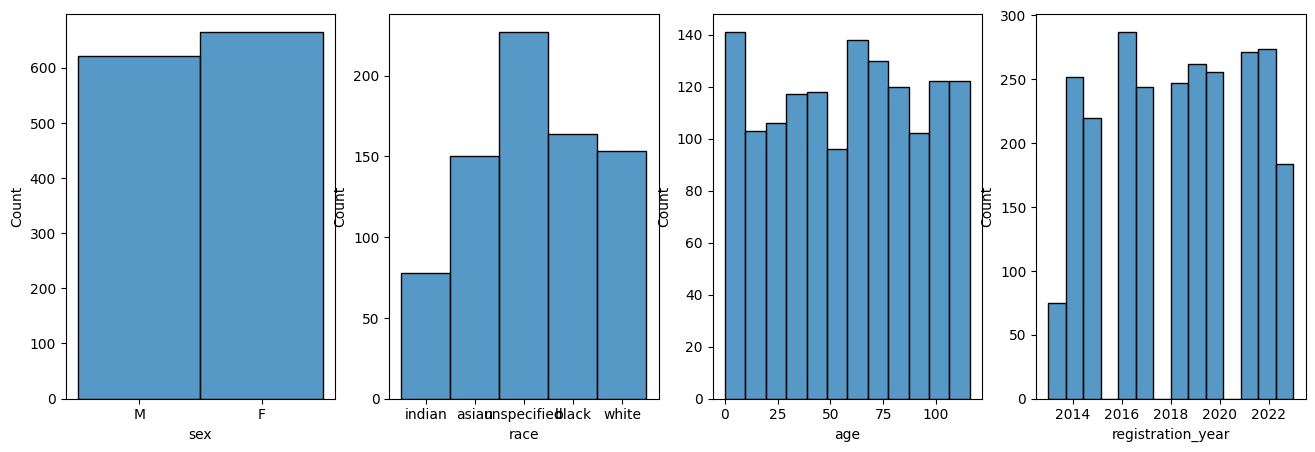

In [24]:
users.birthdate = pd.to_datetime(users.birthdate, format='mixed')
users.registration = pd.to_datetime(users.registration, format='mixed')
users['age'] = pd.Timestamp.now().year - users['birthdate'].dt.year
users['registration_year'] = users['registration'].dt.year

user_columns = ['sex', 'race', 'age', 'registration_year']
fig, axes = plt.subplots(1, len(user_columns), figsize=(16, 5))
for i, column in enumerate(user_columns):
    sns.histplot(data=users, x=column, ax=axes[i])
plt.show()

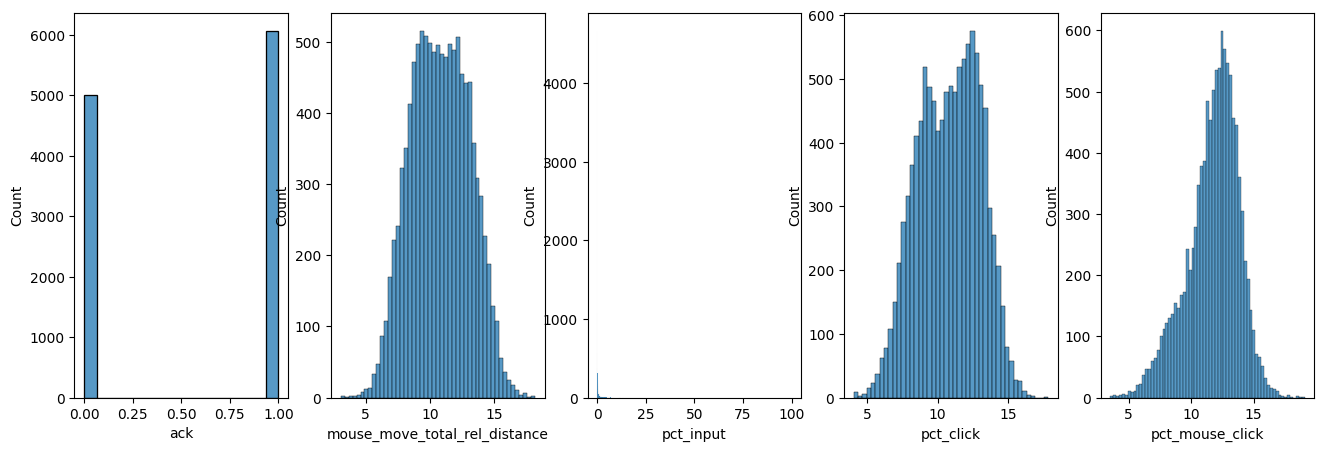

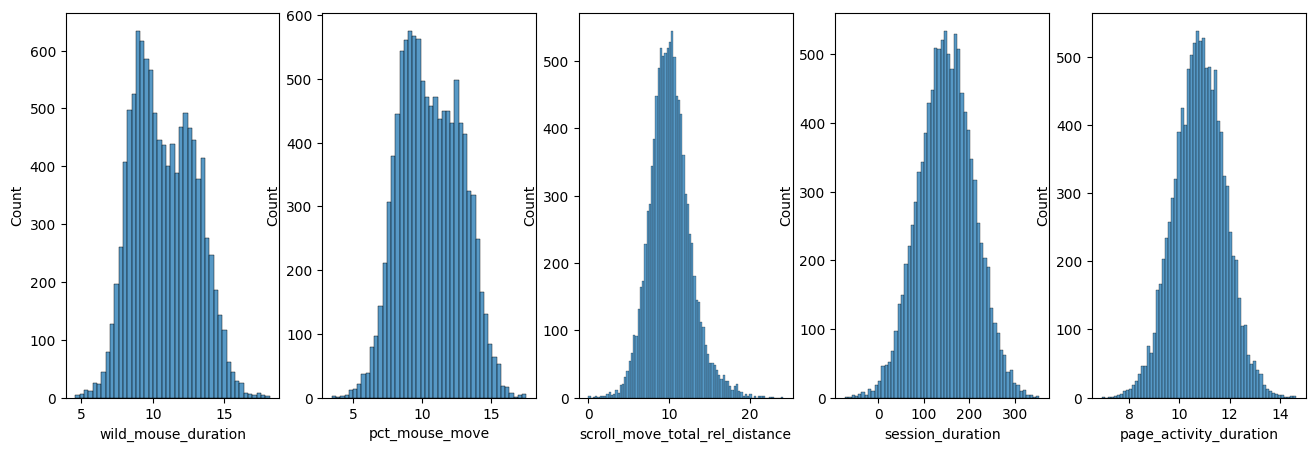

In [25]:
sessions_columns = [["ack", "mouse_move_total_rel_distance", "pct_input", "pct_click", "pct_mouse_click"], ["wild_mouse_duration", "pct_mouse_move", "scroll_move_total_rel_distance", "session_duration", "page_activity_duration"]]

fig1, axes1 = plt.subplots(1, len(sessions_columns[0]), figsize=(16, 5))
fig2, axes2 = plt.subplots(1, len(sessions_columns[1]), figsize=(16, 5))

for i, columns in enumerate([sessions_columns[0], sessions_columns[1]]):
    for j, column in enumerate(columns):
        sns.histplot(data=sessions, x=column, ax=[axes1, axes2][i][j])

plt.show()

# 1.3 Párová analýza dát
Jednoduchým spôsobom ako nájsť vzťahy medzi atribútmi je pomocou heat mapy, ktorá zobrazuje ako silná je korelácia medzi nimi. Dvojici udelí hodnotu z intervalu <-1,1>, 0 značí žiadnu koreláciu -1 dokonalú zápornú a 1 dokonalú kladnú. 

<Axes: >

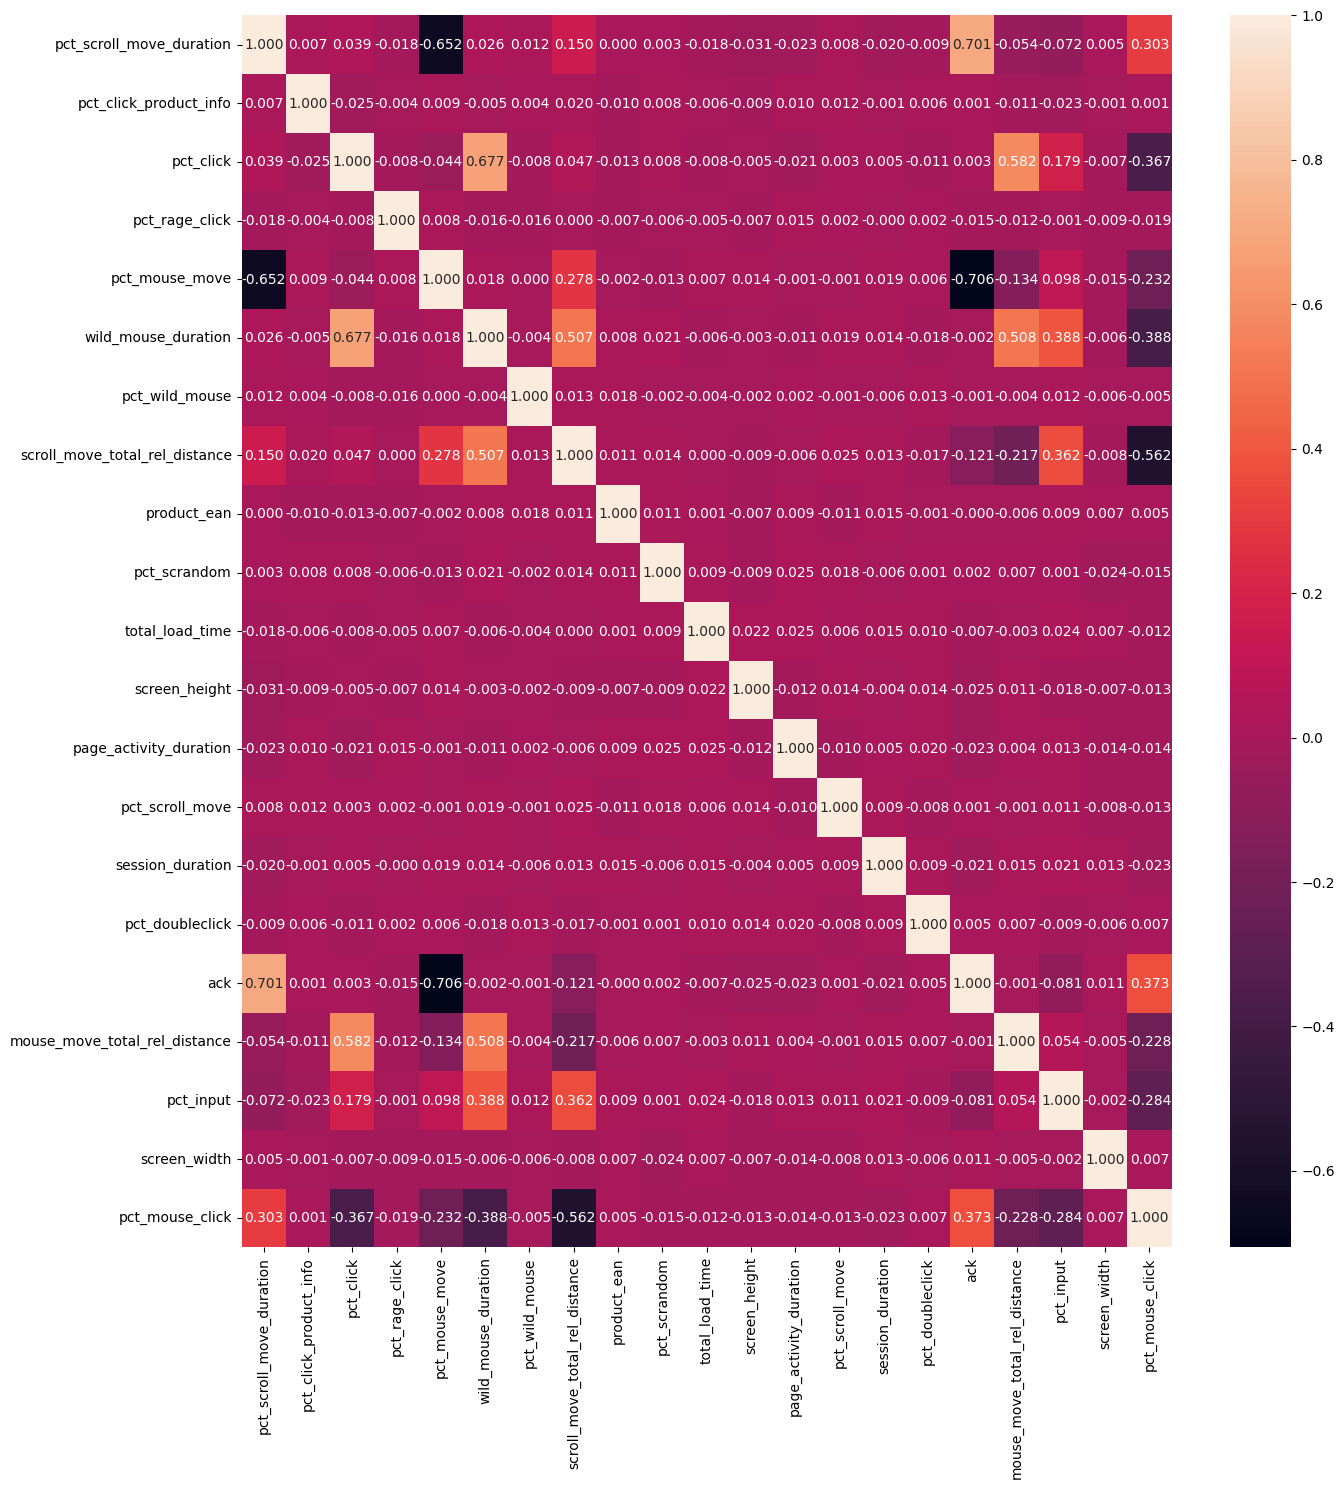

In [26]:
filtered_sessions = sessions[~sessions['screen_height'].str.contains('lower|higher|other', case=False) & ~sessions['screen_width'].str.contains('lower|higher|other', case=False)]
filtered_sessions = filtered_sessions.drop(['user_id', 'session_start', 'browser_name', 'session_id'], axis=1)
figure, ax = plt.subplots(figsize=(15,16))
sns.heatmap(filtered_sessions.corr(),ax=ax, annot =True, fmt = ".3f")

### pct_click + wild_mouse_duration cor() = 0.677 
### kladná korelácia

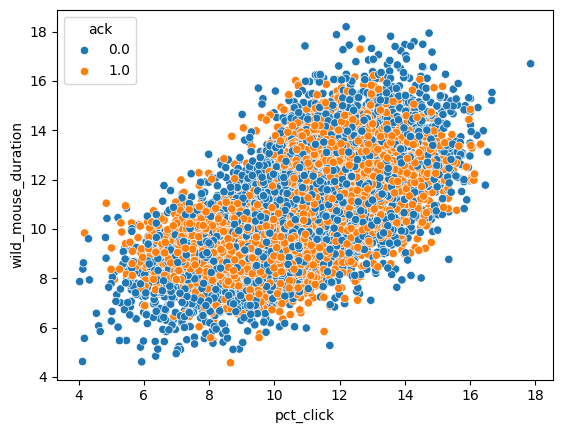

In [27]:
sns.scatterplot(data=sessions, x="pct_click",y="wild_mouse_duration", hue=sessions.ack)
plt.show()

### pct_mouse_move + pct_scroll_move_duration cor() = -0.652 
### negatívna korelácia

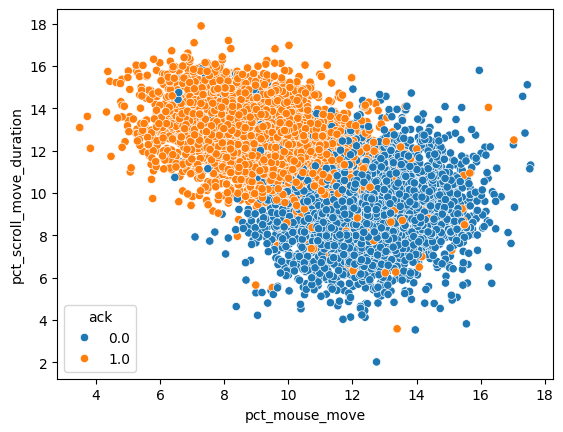

In [28]:
sns.scatterplot(data=sessions, x="pct_mouse_move",y="pct_scroll_move_duration", hue=sessions.ack)
plt.show()

### wild_mouse_duration + pct_input cor() = 0.388 
### logaritmická krivka

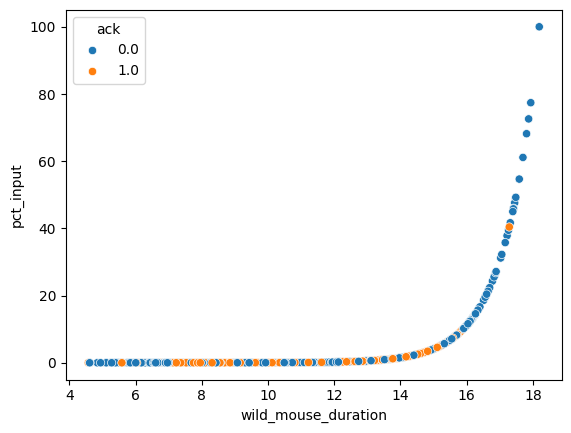

In [29]:
sns.scatterplot(data=sessions, x="wild_mouse_duration", y="pct_input", hue=sessions.ack)
plt.show()

## Závislosť atribútov s ack
### vizualizované pomocou kdeplotu, grafu zobrazujúceho pravdepodobnosť, že nadobudne ack danú hodnotu 
### pct_scroll_move_duration cor() = 0.701
Tí, ktorí si zakúpili viacej scrollovali

<Axes: xlabel='pct_scroll_move_duration', ylabel='Density'>

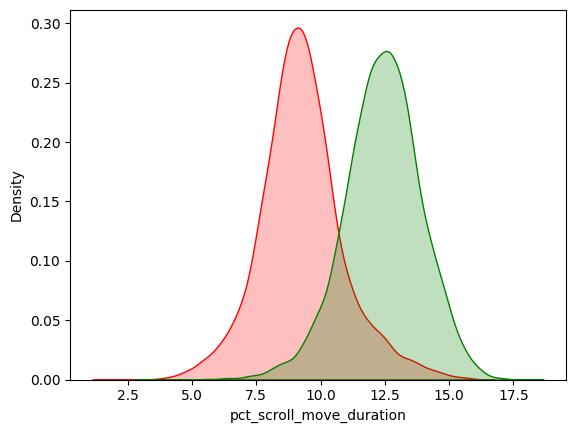

In [30]:
sns.kdeplot(sessions.loc[(sessions.ack == 0), 'pct_scroll_move_duration'], color='r', fill=True)
sns.kdeplot(sessions.loc[(sessions.ack == 1), 'pct_scroll_move_duration'], color='g', fill=True)

### pct_mouse_move cor() = -0.706
Tí, ktorí si zakúpili menej hýbali myšou


<Axes: xlabel='pct_mouse_move', ylabel='Density'>

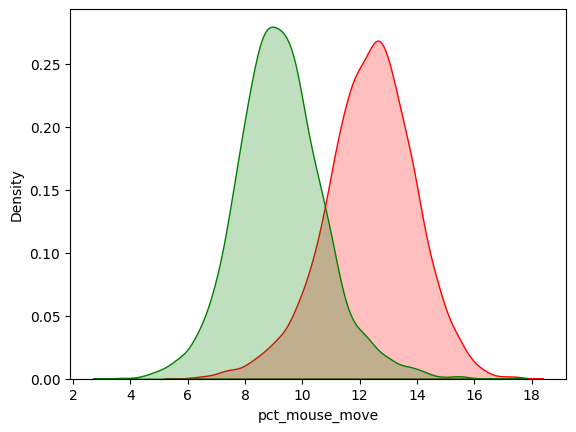

In [31]:
sns.kdeplot(sessions.loc[(sessions.ack == 0), 'pct_mouse_move'], color='r', fill=True)
sns.kdeplot(sessions.loc[(sessions.ack == 1), 'pct_mouse_move'], color='g', fill=True)

### pct_mouse_click cor() = 0.373
Vo veľkej časti sa ack možnosť zhoduje, avšak pozitívna prevláda

<Axes: xlabel='pct_mouse_click', ylabel='Density'>

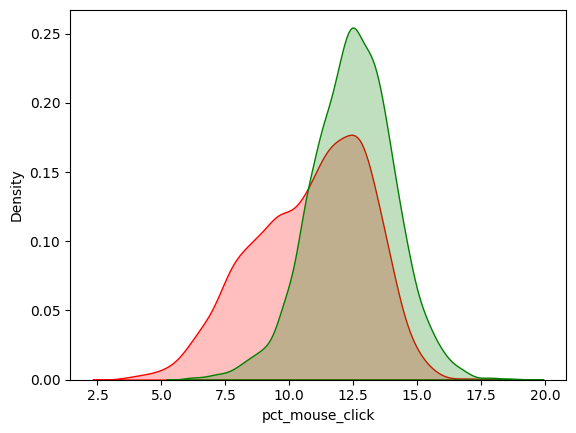

In [32]:
sns.kdeplot(sessions.loc[(sessions.ack == 0), 'pct_mouse_click'], color='r', fill=True)
sns.kdeplot(sessions.loc[(sessions.ack == 1), 'pct_mouse_click'], color='g', fill=True)

## 1.4.1 Dajú sa kombinovať záznamy z viacerých súborov? a je to nutné ?
V teórií by sa mali dať jednoducho skombinovať pomocou columns user_id, session_id, product_ean avšak súbor products nie je možné namapovať na sessions, pretože neobsahuje žiadne zhodné product_ean

In [33]:
products.merge(sessions, on="product_ean", how="inner")


,location,code,product_ean,store_name,pct_scroll_move_duration,pct_click_product_info,pct_click,pct_rage_click,pct_mouse_move,wild_mouse_duration,...,session_duration,pct_doubleclick,ack,session_start,user_id,mouse_move_total_rel_distance,pct_input,screen_width,browser_name,pct_mouse_click


a pre userov existujú duplikátne user_id, takže pokiaľ by sme sa ho rozhodli namapovať na sessions museli by sme sa zbaviť duplikátov, pre momentálne odovzdanie to však nie je nutné je možné vytvoriť hypotézy aj bez toho, aby sme sa zaujímali o userov


In [34]:
users.user_id.duplicated().sum()

933

## 2. Identifikácia problémov v dátach s prvotným riešením

### users.csv
* birthdate je v rozličných formátoch, takže ho bude treba uceliť - upravili sme ho už pri vizualizácií
* odstránenie nan hodnôt pomocou pridania defaultnej hodnoty unspecified, alebo mean pre dátumy narodenia 
* residence a address obsahujú \n, \r, ktoré nahradíme za ' ' pre lepšiu čitateľnosť
* dataset obsahuje aj užívateľov s vekom menej ako 18, ktorý pravdepodobne nenakupúju a tak môžu skresľovať výsledky
* duplikátne user_id a emaily - rozhodli sme sa pre tento kontrolný bod ponechať


#### Odstránenie nan hodnôt

In [35]:
users.isnull().sum()

birthdate            1157
residence            1672
registration            0
name                    0
username                0
race                 1800
job                  1543
mail                    0
user_id                 0
sex                  1286
address               386
age                  1157
registration_year       0
dtype: int64

In [36]:
users.sex = users.sex.replace(np.nan, 'unspecified')
users.race = users.race.replace(np.nan, 'unspecified')
users.job = users.job.replace(np.nan, 'unspecified')
users.residence = users.race.replace(np.nan, 'unspecified')

mean_birthdate = pd.to_datetime(users['birthdate']).mean()
users['birthdate'].fillna(mean_birthdate, inplace=True)

#### Zlepšenie čitateľnosti adresy a bydliska

In [37]:
users.address = users.address.str.replace('\n', ' ')
users.address = users.address.str.replace('\r', ' ')
users.residence = users.residence.str.replace('\n', ' ')
users.address = users.address.str.replace('\r', ' ')

#### Odstránenie užívateľov mladších ako 18

In [38]:
users = users[users['age'] >= 18]

#### Napriek tomu, že sú kontá, ktoré majú rovnaký email užívatelia sa nezhodujú v menách, tak sme sa rozhodli ich ponechať
#### redundantných mailov je

In [39]:
duplicate_emails = users[users.duplicated(subset=['mail'], keep=False)]
distinct_duplicate_emails = duplicate_emails['mail'].unique()
list(distinct_duplicate_emails)

['btakahashi@gmail.com', 'suzukiyosuke@gmail.com']

In [40]:
for email, group in duplicate_emails.groupby('mail'):
    if group['name'].nunique() == 1:
        print(group)

### sessions.csv
* screen_height - obsahuje 1653 nenumerických záznamov ('lower', 'higher')
* screen_width - obsahuje 1665 nenumerických záznamov ('lower', 'higher')
* session_start je potrebné preconvertovať na dátum
* duplikátne riadky
* riadky so záporným časom trvania sedenia
* nan hodnoty nahradíme priemerom

In [41]:
columns_to_check = ["screen_height", "screen_width"]

non_numeric_counts = {}
for column in columns_to_check:
    numeric_values = pd.to_numeric(sessions[column], errors='coerce')

    non_numeric_count = numeric_values.isna().sum()
    non_numeric_counts[column] = non_numeric_count

list(non_numeric_counts.items())

[('screen_height', 1653), ('screen_width', 1665)]

In [42]:
sessions.screen_width = pd.to_numeric(sessions.screen_width, errors='coerce')
sessions.screen_width.fillna(sessions.screen_width.mean(), inplace=True)
sessions.screen_width = sessions.screen_width.astype(int)


sessions.screen_height = pd.to_numeric(sessions.screen_height, errors='coerce')
average = sessions.screen_height.mean()
sessions.screen_height.fillna(average, inplace=True)
sessions.screen_height = sessions.screen_height.astype(int)
sessions.screen_height.unique()

array([ 768, 1080,  800,  600,  862, 1024])

#### Napravenie dátumu session_start

In [43]:
sessions.session_start = pd.to_datetime(sessions.session_start, format='mixed')

#### Keďže sessions obsahuje duplikátne riadky dropneme ich

In [44]:
print(len(sessions[sessions.duplicated()]))
sessions = sessions.drop_duplicates()

131


#### Riadky obsahujúce nan hodnoty nahradíme s mean

In [45]:
sessions.isnull().sum()

pct_scroll_move_duration          11
pct_click_product_info            11
pct_click                         11
pct_rage_click                    11
pct_mouse_move                    11
wild_mouse_duration               11
pct_wild_mouse                    11
session_id                         0
scroll_move_total_rel_distance    11
product_ean                        0
pct_scrandom                      11
total_load_time                    0
screen_height                      0
page_activity_duration            11
pct_scroll_move                   11
session_duration                   0
pct_doubleclick                   11
ack                                0
session_start                      0
user_id                            0
mouse_move_total_rel_distance     11
pct_input                         11
screen_width                       0
browser_name                       0
pct_mouse_click                   11
dtype: int64

In [46]:
numeric_columns = sessions.select_dtypes(include=[np.number]).columns
sessions.loc[:, numeric_columns] = sessions.loc[:, numeric_columns].fillna(sessions[numeric_columns].mean())

#### Spodní Outlieri session_duration by nam mohli skreslovať výsledky, tak ich dáme preč

<Axes: >

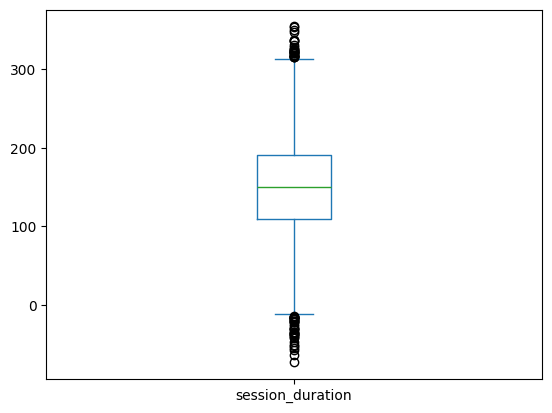

In [47]:
sessions.session_duration.plot(kind='box')

In [48]:
sessions = sessions[sessions.session_duration >= 0]

<Axes: >

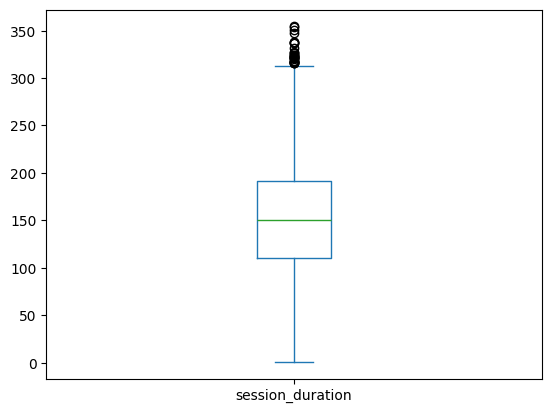

In [49]:
sessions.session_duration.plot(kind='box')

## 3. Formulácia a štatistické overenie hypotéz o
dátach
V štatistike sa používajú nulové a alternatívne hypotézy na testovanie rôznych štatistických
tvrdení.
1. Nulová hypotéza (H0) - začiatočný predpoklad. Obsahuje tvrdenie, že neexistuje
žiadna zmena alebo vzťah medzi premennými. V podstatetvrdí, že akýkoľvek vzťah
je len výsledkom náhody.
2. Alternatívna hypotéza (H1, Ha) - opak nulovej hypotézy. Tvrdí, že existuje nejaký
vzťah medzi premennými. V podstate, alternatívna hypotéza popisuje to, čo sa
snažíme štatisticky dokázať.
Hlavné predpoklady pre vykonanie štatistických testov sú:
• dáta majú normálnu (gaussovskú) distribúciu
• skupiny dát ktoré porovnávame majú podobnú varianciu Ak dáta nespĺňajú tieto kritériá,
je lepšie použiť neparametrické testy